In [1]:
import pandas as pd
import numpy as np
import glob
import os
import sys
import soundfile

In [2]:
import librosa
import librosa.display
import seaborn as sbn
import matplotlib.pyplot as plt
from sklearn import metrics

In [3]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [4]:
import IPython.display
from IPython.display import Audio

In [6]:
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter('ignore')
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [9]:
RavdessData=r"C:\\R-dataset"

In [10]:
ravdessDirectoryList = os.listdir(RavdessData)
fileEmotion = []
filePath = []
for dir in ravdessDirectoryList:
    actor = os.listdir(RavdessData+"\\"+dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        fileEmotion.append(int(part[2]))
        filePath.append(RavdessData+"\\"+dir+"\\"+file)
emotion_df = pd.DataFrame(fileEmotion,columns = ['Emotions'])
path_df=pd.DataFrame(filePath,columns = ['Path'])
Ravdess_df = pd.concat([emotion_df,path_df],axis=1)
print(filePath)

['C:\\\\R-dataset\\Actor_01\\03-02-01-01-01-01-01.wav', 'C:\\\\R-dataset\\Actor_01\\03-02-01-01-01-02-01.wav', 'C:\\\\R-dataset\\Actor_01\\03-02-01-01-02-01-01.wav', 'C:\\\\R-dataset\\Actor_01\\03-02-01-01-02-02-01.wav', 'C:\\\\R-dataset\\Actor_01\\03-02-02-01-01-01-01.wav', 'C:\\\\R-dataset\\Actor_01\\03-02-02-01-01-02-01.wav', 'C:\\\\R-dataset\\Actor_01\\03-02-02-01-02-01-01.wav', 'C:\\\\R-dataset\\Actor_01\\03-02-02-01-02-02-01.wav', 'C:\\\\R-dataset\\Actor_01\\03-02-02-02-01-01-01.wav', 'C:\\\\R-dataset\\Actor_01\\03-02-02-02-01-02-01.wav', 'C:\\\\R-dataset\\Actor_01\\03-02-02-02-02-01-01.wav', 'C:\\\\R-dataset\\Actor_01\\03-02-02-02-02-02-01.wav', 'C:\\\\R-dataset\\Actor_01\\03-02-03-01-01-01-01.wav', 'C:\\\\R-dataset\\Actor_01\\03-02-03-01-01-02-01.wav', 'C:\\\\R-dataset\\Actor_01\\03-02-03-01-02-01-01.wav', 'C:\\\\R-dataset\\Actor_01\\03-02-03-01-02-02-01.wav', 'C:\\\\R-dataset\\Actor_01\\03-02-03-02-01-01-01.wav', 'C:\\\\R-dataset\\Actor_01\\03-02-03-02-01-02-01.wav', 'C:\\\\R-

In [11]:
Ravdess_df.Emotions.replace({1:'neutral',2:'calm',3:'happy',4:'sad',5:'angry',6:'fear',7:'disgust',8:'surprise'},inplace=True)
Ravdess_df.head()

,Emotions,Path
0,neutral,C:\\R-dataset\Actor_01\03-02-01-01-01-01-01.wav
1,neutral,C:\\R-dataset\Actor_01\03-02-01-01-01-02-01.wav
2,neutral,C:\\R-dataset\Actor_01\03-02-01-01-02-01-01.wav
3,neutral,C:\\R-dataset\Actor_01\03-02-01-01-02-02-01.wav
4,calm,C:\\R-dataset\Actor_01\03-02-02-01-01-01-01.wav


In [12]:
dataPath=pd.concat([Ravdess_df],axis=0)
dataPath.to_csv(r"data_Path.csv",index=False)
dataPath.head()

,Emotions,Path
0,neutral,C:\\R-dataset\Actor_01\03-02-01-01-01-01-01.wav
1,neutral,C:\\R-dataset\Actor_01\03-02-01-01-01-02-01.wav
2,neutral,C:\\R-dataset\Actor_01\03-02-01-01-02-01-01.wav
3,neutral,C:\\R-dataset\Actor_01\03-02-01-01-02-02-01.wav
4,calm,C:\\R-dataset\Actor_01\03-02-02-01-01-01-01.wav


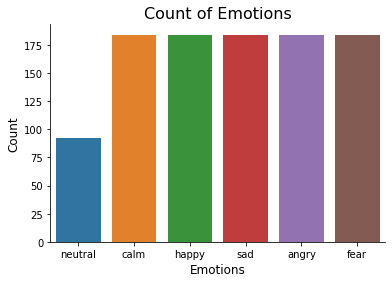

In [13]:
plt.title('Count of Emotions',size=16)
sbn.countplot(dataPath.Emotions)
plt.ylabel('Count',size=12)
plt.xlabel('Emotions',size=12)
sbn.despine(top=True,right=True,left=False,bottom=False)
plt.show()

In [14]:
def createWaveplot(data,sr,e):
    plt.figure(figsize=(10,3))
    plt.title('Waveplot for audio with {} emotion'.format(e),size=15)
    librosa.display.waveshow(data,sr=sr)
    plt.show()

In [15]:
def createSpectrogram(data,sr,e):
    X=librosa.stft(data)
    Xdb=librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12,3))
    plt.title('Spectrogram for audio with {} emotion'.format(e),size=15)
    librosa.display.specshow(Xdb,sr=sr,x_axis='time',y_axis='hz')
    plt.colorbar()

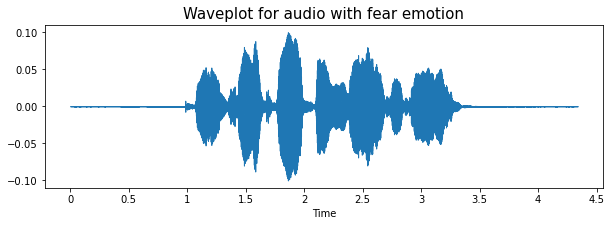

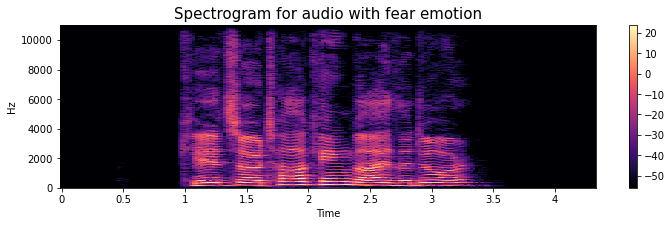

In [16]:
emotion='fear'
path=np.array(dataPath.Path[dataPath.Emotions==emotion])[1]
data,samplingRate=librosa.load(path)
createWaveplot(data,samplingRate,emotion)
createSpectrogram(data,samplingRate,emotion)
Audio(path)

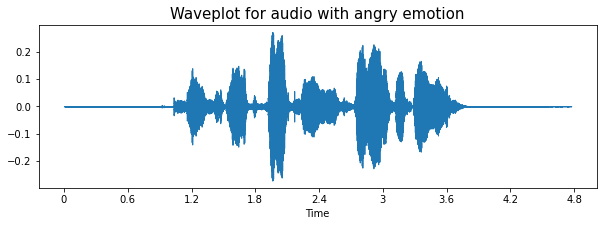

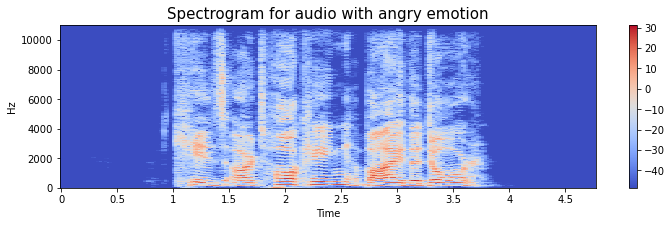

In [17]:
emotion='angry'
path=np.array(dataPath.Path[dataPath.Emotions==emotion])[1]
data,samplingRate=librosa.load(path)
createWaveplot(data,samplingRate,emotion)
createSpectrogram(data,samplingRate,emotion)
Audio(path)

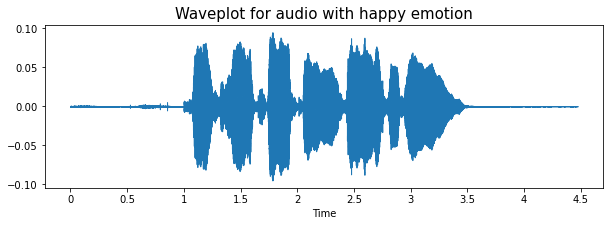

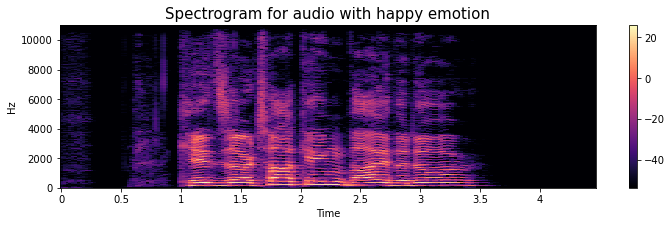

In [18]:
emotion='happy'
path=np.array(dataPath.Path[dataPath.Emotions==emotion])[1]
data,samplingRate=librosa.load(path)
createWaveplot(data,samplingRate,emotion)
createSpectrogram(data,samplingRate,emotion)
Audio(path)

In [19]:
def noise(data):
    noiseAmp=0.035*np.random.uniform()*np.amax(data)
    data=data+noiseAmp*np.random.normal(size=data.shape[0])
    return data

def stretch(data,rate=0.8):
    return librosa.effects.time_stretch(data,rate)

def shift(data):
    shiftRange=int(np.random.uniform(low=-5,high=5)*1000)
    return np.roll(data,shiftRange)

def pitch(data,samplingRate,pitchFactor=0.7):
    return librosa.effects.pitch_shift(data,samplingRate,pitchFactor)

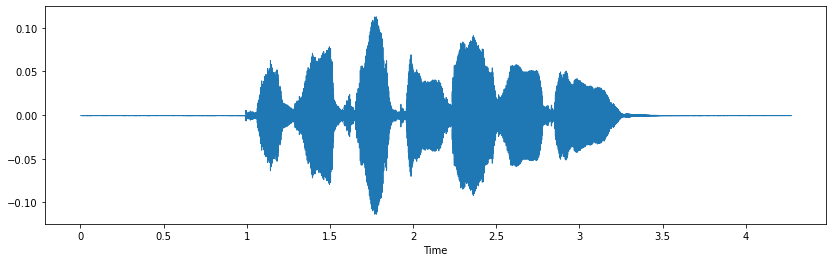

In [20]:
path=np.array(dataPath.Path)[1]
data,sampleRate=librosa.load(path)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sampleRate)
Audio(path)

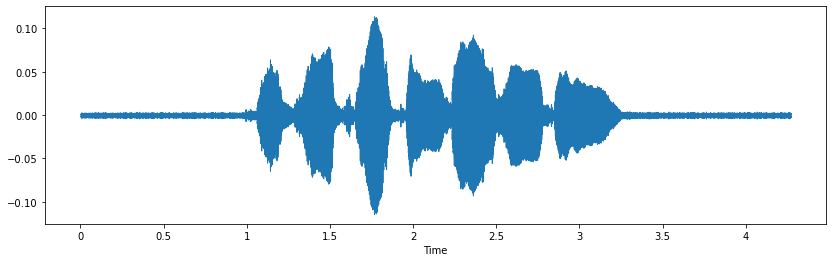

In [21]:
x=noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x,sr=sampleRate)
Audio(x,rate=sampleRate)

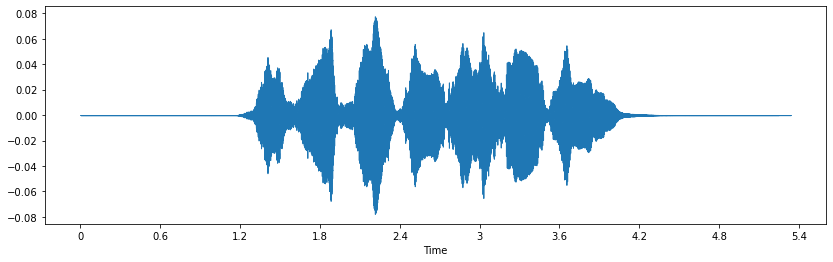

In [22]:
x=stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x,sr=sampleRate)
Audio(x,rate=sampleRate)

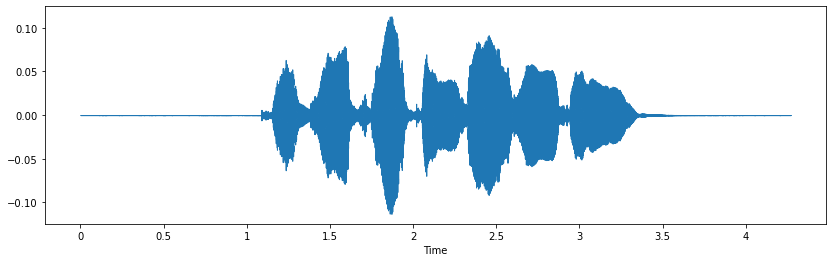

In [23]:
x=shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x,sr=sampleRate)
Audio(x,rate=sampleRate)

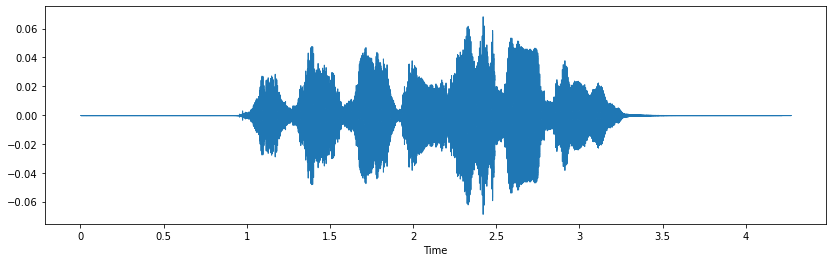

In [24]:
x=pitch(data,sampleRate)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x,sr=sampleRate)
Audio(x,rate=sampleRate)

In [25]:
def extractFeature(fileName,mfcc,chroma,mel):
    with soundfile.SoundFile(fileName) as soundFile:
        X=soundFile.read(dtype="float32")
        sampleRate=soundFile.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X,sr=sampleRate,n_mfcc=40).T,axis=0)
        result=np.hstack((result,mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft,sr=sampleRate).T,axis=0)
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X,sr=sampleRate).T,axis=0)
        result=np.hstack((result,mel))
    return result

In [26]:
emotions={
    '01':'neutral',
    '02':'calm',
    '03':'happy',
    '04':'sad',
    '05':'angry',
    '06':'fearful',
    '07':'disgust',
    '08':'surprised'
}
observedEmotions=['calm','happy','fearful','disgust']